In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("out.csv")
sorted_indices = (df["reserve0"] + df["reserve1"]).sort_values(ascending=False).index

df=df.loc[sorted_indices, :]
df = df[df['reserve0']!=0]
df=df[df['reserve1']!=0]

In [3]:
df['token0'] = df['token0'].apply(lambda n: n[68:] if len(n) > 66 else n)
df['token1'] = df['token1'].apply(lambda n: n[68:] if len(n) > 66 else n)

In [4]:
coreassetids = set(df['cgid0'].unique()).union(df['cgid1'].unique()) 

In [5]:
from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()
def price(cgid):
    return cg.get_price(ids=cgid, vs_currencies='usd')[cgid]['usd']

In [6]:
prices = {}
for cgid in coreassetids:
    prices[cgid] = price(cgid)
prices

{'aptos': 8.93,
 'solana': 31.73,
 'wrapped-bitcoin': 20081,
 'tether': 1.002,
 'usd-coin': 0.998875,
 'ethereum': 1480.32,
 'shitcoin': 3.0752e-08}

In [7]:
df['r0_du'] = df['reserve0'] / 10 ** df["token0_dec"]
df['r1_du'] = df['reserve1'] / 10 ** df["token1_dec"]
def get_core_liq(row):
#     print(row)
    if row["coreasset"] == 2:
        return row['r0_du']*prices[row['cgid0']] +row['r1_du']*prices[row['cgid1']]
    elif row["coreasset"] == 1:
        return row['r1_du'] * prices[row['cgid1']]
    else:
        return row['r0_du'] * prices[row['cgid0']]
df['core_liq'] = df.apply(get_core_liq, axis=1)

In [8]:
df

,token0,token1,reserve0,reserve1,token0_dec,token1_dec,coreasset,n0,n1,cgid0,cgid1,pooltype,r0_du,r1_du,core_liq
912,ehtoken::ET,0x1::aptos_coin::AptosCoin,9603098496061343996,9674193,6,8,1,shitcoin,aptos,shitcoin,aptos,0x190d44266241744264b964a37b8f09863167a12d3e70...,9.603098e+12,9.674193e-02,8.639054e-01
862,GETRICH::GETRICH,0x1::aptos_coin::AptosCoin,5882296008614746856,954165861,6,8,1,shitcoin,aptos,shitcoin,aptos,0x190d44266241744264b964a37b8f09863167a12d3e70...,5.882296e+12,9.541659e+00,8.520701e+01
1268,Halloweem::HALLO,0x1::aptos_coin::AptosCoin,1925783996314171536,6550459548,6,8,1,shitcoin,aptos,shitcoin,aptos,0x190d44266241744264b964a37b8f09863167a12d3e70...,1.925784e+12,6.550460e+01,5.849560e+02
340,henlongtoken::SHL,0x1::aptos_coin::AptosCoin,1000000000000000000,10000000,6,8,1,shitcoin,aptos,shitcoin,aptos,0x190d44266241744264b964a37b8f09863167a12d3e70...,1.000000e+12,1.000000e-01,8.930000e-01
1309,apt_king::APTKING,0x1::aptos_coin::AptosCoin,960176849325902723,5094232716,6,8,1,shitcoin,aptos,shitcoin,aptos,0x190d44266241744264b964a37b8f09863167a12d3e70...,9.601768e+11,5.094233e+01,4.549150e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,llama::Llama,0x1::aptos_coin::AptosCoin,2254,47,6,8,1,shitcoin,aptos,shitcoin,aptos,0x190d44266241744264b964a37b8f09863167a12d3e70...,2.254000e-03,4.700000e-07,4.197100e-06
1319,bee::Bee,0x1::aptos_coin::AptosCoin,2253,48,6,8,1,shitcoin,aptos,shitcoin,aptos,0x190d44266241744264b964a37b8f09863167a12d3e70...,2.253000e-03,4.800000e-07,4.286400e-06
1098,hen::Hen,0x1::aptos_coin::AptosCoin,2251,47,6,8,1,shitcoin,aptos,shitcoin,aptos,0x190d44266241744264b964a37b8f09863167a12d3e70...,2.251000e-03,4.700000e-07,4.197100e-06
1303,moon_coin::MoonCoin,0x1::aptos_coin::AptosCoin,22,273,6,8,1,shitcoin,aptos,shitcoin,aptos,0x190d44266241744264b964a37b8f09863167a12d3e70...,2.200000e-05,2.730000e-06,2.437890e-05


In [38]:
df=df[(df['token0']=='0x1::aptos_coin::AptosCoin') | (df['token1']=='0x1::aptos_coin::AptosCoin')]

In [200]:
df["core_liq"].sum()


8675828.92340669

In [41]:
df[(df['poolname']=='usd-coin-zero/aptos') |(df['poolname']=='aptos/usd-coin-zero') ]['core_liq'].sum()

1140102.2408348357

In [39]:
df.sort_values('core_liq', ascending=False)

,token0,token1,reserve0,reserve1,token0_dec,token1_dec,coreasset,n0,n1,cgid0,cgid1,pooltype,r0_du,r1_du,core_liq,w,poolname
1457,asset::USDC,0x1::aptos_coin::AptosCoin,568398094262,6409204901557,6,8,2,usd-coin-zero,aptos,usd-coin,aptos,0x190d44266241744264b964a37b8f09863167a12d3e70...,5.683981e+05,6.409205e+04,1.140101e+06,4.140669e-01,usd-coin-zero/aptos
1482,asset::WETH,0x1::aptos_coin::AptosCoin,124805946,2059854660697,6,8,2,ethereum-zero,aptos,ethereum,aptos,0x190d44266241744264b964a37b8f09863167a12d3e70...,1.248059e+02,2.059855e+04,3.686978e+05,1.339053e-01,ethereum-zero/aptos
722,coin::T,0x1::aptos_coin::AptosCoin,175730523999,1974798429492,6,8,2,usd-coin-eth,aptos,usd-coin,aptos,0x190d44266241744264b964a37b8f09863167a12d3e70...,1.757305e+05,1.974798e+04,3.518823e+05,1.277982e-01,usd-coin-eth/aptos
131,0x1::aptos_coin::AptosCoin,staked_aptos_coin::StakedAptosCoin,1309578201497,1945262238561,8,8,2,aptos,tortuga staptos,aptos,aptos,0x190d44266241744264b964a37b8f09863167a12d3e70...,1.309578e+04,1.945262e+04,2.906573e+05,1.055622e-01,aptos/tortuga staptos
947,coin::MOJO,0x1::aptos_coin::AptosCoin,1103419839159271,3113446233975,6,8,1,shitcoin,aptos,shitcoin,aptos,0x190d44266241744264b964a37b8f09863167a12d3e70...,1.103420e+09,3.113446e+04,2.780307e+05,1.009765e-01,shitcoin/aptos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,0x1::aptos_coin::AptosCoin,PRT__RPIURA::protonxtua,2,403588001467,8,6,0,aptos,shitcoin,aptos,shitcoin,0x190d44266241744264b964a37b8f09863167a12d3e70...,2.000000e-08,4.035880e+05,1.786000e-07,6.486476e-14,aptos/shitcoin
16,0x1::aptos_coin::AptosCoin,PRT__GKXTXF::protonbxuz,2,96832862545,8,6,0,aptos,shitcoin,aptos,shitcoin,0x190d44266241744264b964a37b8f09863167a12d3e70...,2.000000e-08,9.683286e+04,1.786000e-07,6.486476e-14,aptos/shitcoin
1400,Coin::AptosDog,0x1::aptos_coin::AptosCoin,99900001,2,6,8,1,shitcoin,aptos,shitcoin,aptos,0x190d44266241744264b964a37b8f09863167a12d3e70...,9.990000e+01,2.000000e-08,1.786000e-07,6.486476e-14,shitcoin/aptos
1272,x::X,0x1::aptos_coin::AptosCoin,92987,1,6,8,1,shitcoin,aptos,shitcoin,aptos,0x190d44266241744264b964a37b8f09863167a12d3e70...,9.298700e-02,1.000000e-08,8.930000e-08,3.243238e-14,shitcoin/aptos


In [14]:
df['w'] = df['core_liq'] / df['core_liq'].sum()
df['poolname'] = df["n0"] + "/" + df["n1"]

/tmp/ipykernel_2947698/3030502880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['w'] = df['core_liq'] / df['core_liq'].sum()
/tmp/ipykernel_2947698/3030502880.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['poolname'] = df["n0"] + "/" + df["n1"]


1457    1.140101e+06
1482    3.686978e+05
722     3.518823e+05
131     2.906573e+05
947     2.780307e+05
238     9.968635e+04
1144    5.271911e+04
1473    4.058393e+04
715     2.277879e+04
239     1.194227e+04
1260    1.132462e+04
464     1.009558e+04
42      9.851935e+03
61      8.930000e+03
1083    7.695410e+03
Name: core_liq, dtype: float64
aptos sum: 2753421.282072097


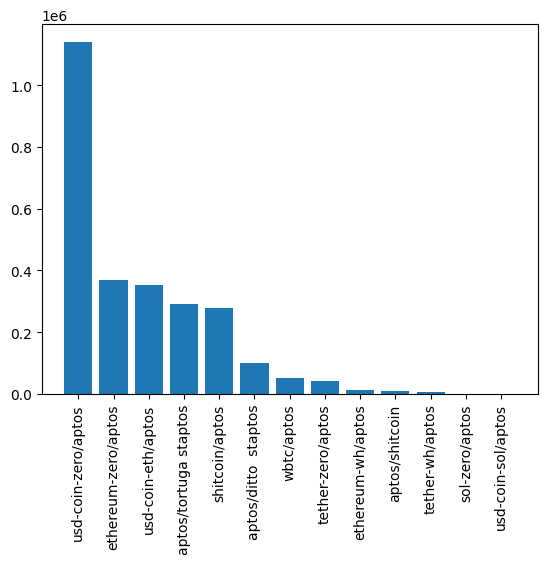

In [37]:
# function to add value labels
fig, ax = plt.subplots()
df=df.sort_values('core_liq', ascending=False)
plt.bar(df['poolname'], df['core_liq'])
# calling the function to add value labels
# addlabels(df['poolname'].tolist(), df['core_liq'].tolist())
plt.xticks(rotation = 90)
mapping = {day: i for i, day in enumerate(df['poolname'])}
key = df['day'].map(mapping)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df['core_liq'].head(15))
print("aptos sum:", df['core_liq'].sum())
plt.show()

In [203]:
df.sort_values('w', ascending=False)

,token0,token1,reserve0,reserve1,token0_dec,token1_dec,coreasset,n0,n1,cgid0,cgid1,pooltype,r0_du,r1_du,core_liq,w,poolname
508,asset::USDC,asset::USDT,2130097800209,2173061709749,6,6,2,usd-coin-zero,tether-zero,usd-coin,tether,0x190d44266241744264b964a37b8f09863167a12d3e70...,2.130098e+06,2.173062e+06,4.303160e+06,4.959940e-01,usd-coin-zero/tether-zero
315,coin::T,coin::T,647664032824,652334732600,6,6,2,usd-coin-eth,tether-wh,usd-coin,tether,0x190d44266241744264b964a37b8f09863167a12d3e70...,6.476640e+05,6.523347e+05,1.299999e+06,1.498414e-01,usd-coin-eth/tether-wh
502,asset::USDC,0x1::aptos_coin::AptosCoin,543761426956,5709472809200,6,8,2,usd-coin-zero,aptos,usd-coin,aptos,0x190d44266241744264b964a37b8f09863167a12d3e70...,5.437614e+05,5.709473e+04,1.081594e+06,1.246675e-01,usd-coin-zero/aptos
511,asset::USDC,asset::WETH,516341942014,395689639,6,6,2,usd-coin-zero,ethereum-zero,usd-coin,ethereum,0x190d44266241744264b964a37b8f09863167a12d3e70...,5.163419e+05,3.956896e+02,1.036064e+06,1.194197e-01,usd-coin-zero/ethereum-zero
310,coin::T,0x1::aptos_coin::AptosCoin,180416932861,1909602416868,6,8,2,usd-coin-eth,aptos,usd-coin,aptos,0x190d44266241744264b964a37b8f09863167a12d3e70...,1.804169e+05,1.909602e+04,3.603015e+05,4.152934e-02,usd-coin-eth/aptos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,0x1::aptos_coin::AptosCoin,PRT__RPIURA::protonxtua,2,403588001467,8,6,0,aptos,shitcoin,aptos,shitcoin,0x190d44266241744264b964a37b8f09863167a12d3e70...,2.000000e-08,4.035880e+05,1.884000e-07,2.171550e-14,aptos/shitcoin
10,0x1::aptos_coin::AptosCoin,PRT__GKXTXF::protonbxuz,2,96832862545,8,6,0,aptos,shitcoin,aptos,shitcoin,0x190d44266241744264b964a37b8f09863167a12d3e70...,2.000000e-08,9.683286e+04,1.884000e-07,2.171550e-14,aptos/shitcoin
492,Coin::AptosDog,0x1::aptos_coin::AptosCoin,99900001,2,6,8,1,shitcoin,aptos,shitcoin,aptos,0x190d44266241744264b964a37b8f09863167a12d3e70...,9.990000e+01,2.000000e-08,1.884000e-07,2.171550e-14,shitcoin/aptos
26,0x1::aptos_coin::AptosCoin,Coin::BabyDogeCoins,2,1966753686573,8,6,0,aptos,shitcoin,aptos,shitcoin,0x190d44266241744264b964a37b8f09863167a12d3e70...,2.000000e-08,1.966754e+06,1.884000e-07,2.171550e-14,aptos/shitcoin


In [82]:
import seaborn as sns

sns.set_style('darkgrid')

In [204]:
dff = df[df['w']!=0]

,token0,token1,reserve0,reserve1,token0_dec,token1_dec,coreasset,n0,n1,cgid0,cgid1,pooltype,r0_du,r1_du,core_liq,w,poolname,cw
508,asset::USDC,asset::USDT,2130097800209,2173061709749,6,6,2,usd-coin-zero,tether-zero,usd-coin,tether,0x190d44266241744264b964a37b8f09863167a12d3e70...,2.130098e+06,2.173062e+06,4.303160e+06,0.495994,usd-coin-zero/tether-zero,0.495994
315,coin::T,coin::T,647664032824,652334732600,6,6,2,usd-coin-eth,tether-wh,usd-coin,tether,0x190d44266241744264b964a37b8f09863167a12d3e70...,6.476640e+05,6.523347e+05,1.299999e+06,0.149841,usd-coin-eth/tether-wh,0.645835
502,asset::USDC,0x1::aptos_coin::AptosCoin,543761426956,5709472809200,6,8,2,usd-coin-zero,aptos,usd-coin,aptos,0x190d44266241744264b964a37b8f09863167a12d3e70...,5.437614e+05,5.709473e+04,1.081594e+06,0.124667,usd-coin-zero/aptos,0.770503
511,asset::USDC,asset::WETH,516341942014,395689639,6,6,2,usd-coin-zero,ethereum-zero,usd-coin,ethereum,0x190d44266241744264b964a37b8f09863167a12d3e70...,5.163419e+05,3.956896e+02,1.036064e+06,0.119420,usd-coin-zero/ethereum-zero,0.889923
310,coin::T,0x1::aptos_coin::AptosCoin,180416932861,1909602416868,6,8,2,usd-coin-eth,aptos,usd-coin,aptos,0x190d44266241744264b964a37b8f09863167a12d3e70...,1.804169e+05,1.909602e+04,3.603015e+05,0.041529,usd-coin-eth/aptos,0.931452
519,asset::WETH,0x1::aptos_coin::AptosCoin,135691024,1853373278540,6,8,2,ethereum-zero,aptos,ethereum,aptos,0x190d44266241744264b964a37b8f09863167a12d3e70...,1.356910e+02,1.853373e+04,3.528125e+05,0.040666,ethereum-zero/aptos,0.972118
323,coin::T,asset::USDC,18885367222,24108846911,6,6,2,usd-coin-eth,usd-coin-zero,usd-coin,usd-coin,0x190d44266241744264b964a37b8f09863167a12d3e70...,1.888537e+04,2.410885e+04,4.299421e+04,0.004956,usd-coin-eth/usd-coin-zero,0.977074
317,coin::T,coin::T,19589552445,100914560,6,8,2,usd-coin-eth,wbtc,usd-coin,wrapped-bitcoin,0x190d44266241744264b964a37b8f09863167a12d3e70...,1.958955e+04,1.009146e+00,3.899685e+04,0.004495,usd-coin-eth/wbtc,0.981569
422,coin::T,0x1::aptos_coin::AptosCoin,87409355,180232759896,8,8,2,wbtc,aptos,wrapped-bitcoin,aptos,0x190d44266241744264b964a37b8f09863167a12d3e70...,8.740935e-01,1.802328e+03,3.378798e+04,0.003894,wbtc/aptos,0.985463
513,asset::USDT,0x1::aptos_coin::AptosCoin,15940504042,163591634251,6,8,2,tether-zero,aptos,tether,aptos,0x190d44266241744264b964a37b8f09863167a12d3e70...,1.594050e+04,1.635916e+03,3.135084e+04,0.003614,tether-zero/aptos,0.989077


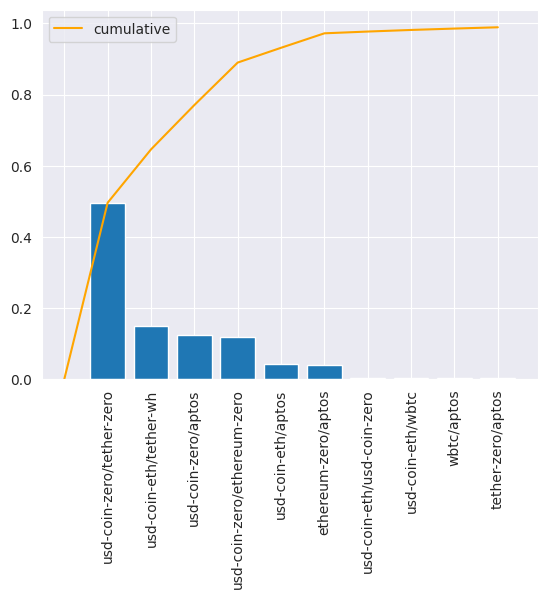

In [205]:
dff = dff.sort_values('w', ascending=False).head(10)
dff['cw']=dff['w'].cumsum()
dff['cw']
plt.plot(pd.concat([pd.Series(['']), dff['poolname']]), pd.concat([pd.Series([0]), dff['cw']]), color='orange', label='cumulative')
# print(dff['cw'])
plt.bar(dff['poolname'], dff['w'])
plt.xticks(rotation = 90)
plt.legend()
dff

In [206]:
dff['poolname']

508      usd-coin-zero/tether-zero
315         usd-coin-eth/tether-wh
502            usd-coin-zero/aptos
511    usd-coin-zero/ethereum-zero
310             usd-coin-eth/aptos
519            ethereum-zero/aptos
323     usd-coin-eth/usd-coin-zero
317              usd-coin-eth/wbtc
422                     wbtc/aptos
513              tether-zero/aptos
Name: poolname, dtype: object

In [209]:
dff.groupby('pooltype').sum()['core_liq']

/tmp/ipykernel_2671655/1324206733.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dff.groupby('pooltype').sum()['core_liq']


pooltype
0x190d44266241744264b964a37b8f09863167a12d3e70cda39376cfb4e3561e12::curves::Stable>          5.646152e+06
0x190d44266241744264b964a37b8f09863167a12d3e70cda39376cfb4e3561e12::curves::Uncorrelated>    2.934908e+06
Name: core_liq, dtype: float64

In [233]:
events=pd.read_csv('events.csv')
events

,pool,type,x,y,lp,x_dec,y_dec,n0,n1,cgid0,cgid1
0,0x190d44266241744264b964a37b8f09863167a12d3e70...,add_liq,50000000,1000000000000,7071066811,8,6,aptos,shitcoin,aptos,shitcoin
1,0x190d44266241744264b964a37b8f09863167a12d3e70...,add_liq,100000000,1000000000000,9999999000,8,6,aptos,shitcoin,aptos,shitcoin
2,0x190d44266241744264b964a37b8f09863167a12d3e70...,add_liq,500000000,5000000000000,49999999000,8,6,aptos,shitcoin,aptos,shitcoin
3,0x190d44266241744264b964a37b8f09863167a12d3e70...,add_liq,400000000,4000000000000,39999999200,8,6,aptos,shitcoin,aptos,shitcoin
4,0x190d44266241744264b964a37b8f09863167a12d3e70...,add_liq,1000000000,100000000000000,316227765016,8,6,aptos,shitcoin,aptos,shitcoin
...,...,...,...,...,...,...,...,...,...,...,...
1070,0x190d44266241744264b964a37b8f09863167a12d3e70...,add_liq,600000000000,6000000000,59999999000,6,8,shitcoin,aptos,shitcoin,aptos
1071,0x190d44266241744264b964a37b8f09863167a12d3e70...,add_liq,5298000,3100000000,128154374,6,8,shitcoin,aptos,shitcoin,aptos
1072,0x190d44266241744264b964a37b8f09863167a12d3e70...,add_liq,1000000000000,100000000,9999999000,6,8,shitcoin,aptos,shitcoin,aptos
1073,0x190d44266241744264b964a37b8f09863167a12d3e70...,add_liq,100000000000000000,10000000000,31622776600683,6,8,shitcoin,aptos,shitcoin,aptos


In [255]:
events['poolname'] = events['n0'] + "/" + events['n1']

In [261]:
events = events[events['poolname'].isin(dff['poolname'])]

In [262]:
events

,pool,type,x,y,lp,x_dec,y_dec,n0,n1,cgid0,cgid1,x_du,y_du,liq_added,poolname
446,0x190d44266241744264b964a37b8f09863167a12d3e70...,add_liq,39600000,500000000,140711472,6,8,usd-coin-eth,aptos,usd-coin,aptos,39.600000,47.100000,86.700000,usd-coin-eth/aptos
447,0x190d44266241744264b964a37b8f09863167a12d3e70...,add_liq,870573,9998389,2909562,6,8,usd-coin-eth,aptos,usd-coin,aptos,0.870573,0.941848,1.812421,usd-coin-eth/aptos
448,0x190d44266241744264b964a37b8f09863167a12d3e70...,add_liq,3511846,39821240,11661904,6,8,usd-coin-eth,aptos,usd-coin,aptos,3.511846,3.751161,7.263007,usd-coin-eth/aptos
449,0x190d44266241744264b964a37b8f09863167a12d3e70...,add_liq,879993,9861841,2905065,6,8,usd-coin-eth,aptos,usd-coin,aptos,0.879993,0.928985,1.808978,usd-coin-eth/aptos
450,0x190d44266241744264b964a37b8f09863167a12d3e70...,add_liq,894184,9970063,2944303,6,8,usd-coin-eth,aptos,usd-coin,aptos,0.894184,0.939180,1.833364,usd-coin-eth/aptos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,0x190d44266241744264b964a37b8f09863167a12d3e70...,add_liq,9477,130000000,1083507,6,8,ethereum-zero,aptos,ethereum,aptos,12.447660,12.246000,24.693660,ethereum-zero/aptos
1059,0x190d44266241744264b964a37b8f09863167a12d3e70...,add_liq,11526,158376763,1318941,6,8,ethereum-zero,aptos,ethereum,aptos,15.138940,14.919091,30.058031,ethereum-zero/aptos
1060,0x190d44266241744264b964a37b8f09863167a12d3e70...,add_liq,36611,500000000,4176614,6,8,ethereum-zero,aptos,ethereum,aptos,48.087084,47.100000,95.187084,ethereum-zero/aptos
1061,0x190d44266241744264b964a37b8f09863167a12d3e70...,add_liq,11091,152462011,1269389,6,8,ethereum-zero,aptos,ethereum,aptos,14.567585,14.361921,28.929506,ethereum-zero/aptos


In [263]:
events['x_du'] = events.apply(lambda row: row['x'] / (10 ** row['x_dec']) * (prices[row['cgid0']] if row['cgid0'] != 'shitcoin' else 0), axis=1)
events['y_du'] = events.apply(lambda row: row['y'] / (10 ** row['y_dec']) * (prices[row['cgid1']] if row['cgid1'] != 'shitcoin' else 0), axis=1)
events['liq_added'] = events['x_du'] + events['y_du']

/tmp/ipykernel_2671655/3231037520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events['x_du'] = events.apply(lambda row: row['x'] / (10 ** row['x_dec']) * (prices[row['cgid0']] if row['cgid0'] != 'shitcoin' else 0), axis=1)
/tmp/ipykernel_2671655/3231037520.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events['y_du'] = events.apply(lambda row: row['y'] / (10 ** row['y_dec']) * (prices[row['cgid1']] if row['cgid1'] != 'shitcoin' else 0), axis=1)
/tmp/ipykernel_2671655/3231037520.py:3: SettingWit

In [264]:
events['liq_added'].sum()

3164477.8095185035

In [275]:
events.groupby('poolname')['liq_added'].transform('sum').sort_values()

697    2.339766e+02
689    2.339766e+02
690    2.339766e+02
691    2.339766e+02
692    2.339766e+02
           ...     
483    1.300611e+06
482    1.300611e+06
481    1.300611e+06
491    1.300611e+06
484    1.300611e+06
Name: liq_added, Length: 251, dtype: float64

In [282]:
grouped_df = events.groupby(['poolname'])

In [285]:
sumed_df = grouped_df.sum()
sumed_df

/tmp/ipykernel_2671655/4254704166.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sumed_df = grouped_df.sum()


,x,y,lp,x_dec,y_dec,x_du,y_du,liq_added
poolname,,,,,,,,
ethereum-zero/aptos,261634,3621541317,30067203,156,208,343.645794,341.149192,6.847950e+02
tether-zero/aptos,508692269,4152611744,1634753106,300,400,508.692269,391.176026,8.998683e+02
usd-coin-eth/aptos,49417967907,522644379894,158381547315,156,208,49417.967907,49233.100586,9.865107e+04
usd-coin-eth/tether-wh,650305721046,650305393691,606443234116,108,108,650305.721046,650305.393691,1.300611e+06
usd-coin-eth/usd-coin-zero,22109930269,21159762076,21405149353,108,108,22109.930269,21159.762076,4.326969e+04
usd-coin-eth/wbtc,288499963507,1502462459,20819694801,18,24,288499.963507,288944.715586,5.774447e+05
usd-coin-zero/aptos,679045196,6946755795,2092215256,156,208,679.045196,654.384396,1.333430e+03
usd-coin-zero/ethereum-zero,510595998718,400024897,13566889997,156,156,510595.998718,525416.701214,1.036013e+06
usd-coin-zero/tether-zero,52148909271,53187576217,52663478010,156,156,52148.909271,53187.576217,1.053365e+05


In [292]:
sumed_df.reset_index(level=0)

,poolname,x,y,lp,x_dec,y_dec,x_du,y_du,liq_added
0,ethereum-zero/aptos,261634,3621541317,30067203,156,208,343.645794,341.149192,6.847950e+02
1,tether-zero/aptos,508692269,4152611744,1634753106,300,400,508.692269,391.176026,8.998683e+02
2,usd-coin-eth/aptos,49417967907,522644379894,158381547315,156,208,49417.967907,49233.100586,9.865107e+04
3,usd-coin-eth/tether-wh,650305721046,650305393691,606443234116,108,108,650305.721046,650305.393691,1.300611e+06
4,usd-coin-eth/usd-coin-zero,22109930269,21159762076,21405149353,108,108,22109.930269,21159.762076,4.326969e+04
5,usd-coin-eth/wbtc,288499963507,1502462459,20819694801,18,24,288499.963507,288944.715586,5.774447e+05
6,usd-coin-zero/aptos,679045196,6946755795,2092215256,156,208,679.045196,654.384396,1.333430e+03
7,usd-coin-zero/ethereum-zero,510595998718,400024897,13566889997,156,156,510595.998718,525416.701214,1.036013e+06
8,usd-coin-zero/tether-zero,52148909271,53187576217,52663478010,156,156,52148.909271,53187.576217,1.053365e+05
9,wbtc/aptos,545528,1370104366,25199001,256,256,104.912726,129.063831,2.339766e+02


In [296]:
sumed_df = sumed_df.reset_index()

In [297]:
sumed_df['poolname']

0            ethereum-zero/aptos
1              tether-zero/aptos
2             usd-coin-eth/aptos
3         usd-coin-eth/tether-wh
4     usd-coin-eth/usd-coin-zero
5              usd-coin-eth/wbtc
6            usd-coin-zero/aptos
7    usd-coin-zero/ethereum-zero
8      usd-coin-zero/tether-zero
9                     wbtc/aptos
Name: poolname, dtype: object

In [331]:
a = 0
dd = {}
for key, item in grouped_df:
    percents = []
    es = grouped_df.get_group(key)['liq_added'].values
    summ = sumed_df[sumed_df['poolname']==key]['liq_added'].item()
    print(summ)
    for e in es:
#         print(e)
#         print(e / sum)
        a += e/summ
        percents.append(e / summ)
    dd[key] = percents

al = pd.DataFrame.from_dict(dd, orient='index').T
        
# print("a", a) 

#     print(b)
#     print(a/b)

684.7949857013999
899.8682952848
98651.06849301481
1300611.1147369999
43269.692344999996
577444.6790933718
1333.429591889
1036012.69993162
105336.485488
233.976557622


/tmp/ipykernel_2671655/3949197449.py:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, item in grouped_df:


In [340]:
al_t = al.transpose()

<AxesSubplot: >

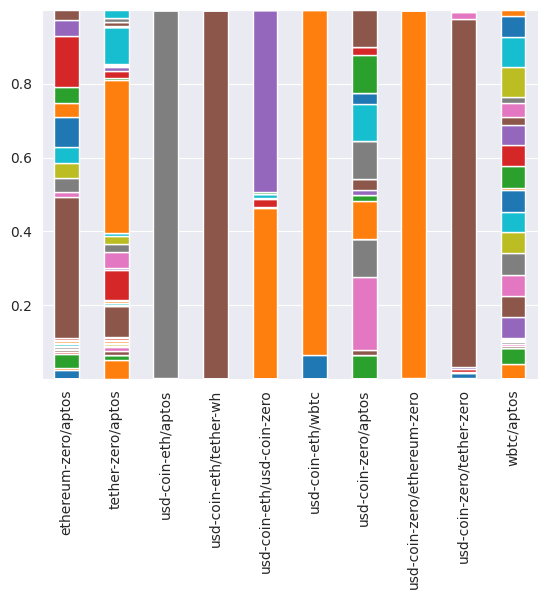

In [343]:
al_t.plot.bar(stacked=True, legend=None)

In [272]:
grouped_df['liq_added'].sum()

poolname             liq_added
ethereum-zero/aptos  0.053206      0.053206
                     0.186117      0.186117
                     2.788193      5.576385
                     2.788950      2.788950
                     2.789057      2.789057
                                    ...    
wbtc/aptos           13.562864    13.562864
                     13.595352    13.595352
                     13.718205    13.718205
                     18.814036    18.814036
                     18.814149    18.814149
Name: liq_added, Length: 246, dtype: float64

In [7]:
df["Name"][0]

'0x190d44266241744264b964a37b8f09863167a12d3e70cda39376cfb4e3561e12::liquidity_pool::LiquidityPool<0x1::aptos_coin::AptosCoin, 0x3fe326f7dabfbfd750a9c498fcbaea1b1911b37027c2617820200d3be688509::TrailCoin::TrailCoin, 0x190d44266241744264b964a37b8f09863167a12d3e70cda39376cfb4e3561e12::curves::Uncorrelated>'

In [ ]:
events